In Python, we need to import various libraries to help us with reading/manipulating data (Pandas), performing numerical calculations (NumPy) and plotting data (Matplotlib). For more information on all these libraries please see the course notes for GEOG-G489/589 Big Data Geospatial Analysis in Python: https://github.com/nmacbean/GEOG-G489-589

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 3: Model Sensitivity

In this exercise we will use the same model code that we've used in Exercises 1 and 2. As in exercise 2 we first have to re-run the model code and read in inputs. We will then test the sensitivity of the parameters to better understand the model behavior and also to use the model to answer some questions about how climate and environmental change may affect the model predictions.

Learning outcomes:
- Explore how changing the parameters affects behavior of the model.
- Understand how to use simple model sensitivity tests to answer questions about how climate and environmental change could affect carbon stocks and fluxes.

## Model Code

The code below is the same as used in Exercise 1 and 2 but formatted in a different way. Please see those exercises for more information on how the model is set-up. There are a few important differences we need to do if we're going to run the model repeatedly to test sensitivity to parameters and inputs and we want to have an efficient way of saving the model outputs.

If we used the code set-up we had in Exercise 1 and 2, we'd have to manually change the parameters and then step through all the code boxes again to get the model to run. If we wanted to save the model variables for each different time we changed a parameter, we'd need to change the name of all the model variables (that we set-up in the "Initialize model variables" code box). This would get messy and complicated very quickly. Instead, we need to separate out the main parts of the code that run each model simulation into a separate script that we can call on repeatedly as we change the inputs to the model (i.e., parameters and climate forcing drivers). Therefore, we need to separate out the following steps into a separate script:
- initialize model variables
- calculate temperature and moisture functions
- model simulation that loops over each timestep, calculates carbon fluxes, and updates model pools


If you go back to the Jupyter Notebook directory, you will also see a file called "simple_2pool_C_model.py". Either on the Github page or from the jupyter notebook directory you can click on that file to see the code we have separated out into a separate script.

You will see in this separate script that we need to read in the information we need to input into the model (the model inputs - parameters and climate forcing "drivers").

Therefore, we can keep the code below that sets the parameters and reads in the inputs in this jupyter notebook - we will modify these later in the exercises - we only separate out the bits of code described in the bullet point list above.  

Note, though, that the way we've set up the parameters below is a bit different. That is because if we set each parameter separately, we would have to pass all the different parameters into the separate script, which is an inefficient way to set-up the code. Instead, we group all these parameters into one single data structure so we only pass one item (this data structure containing all the parameters) to the separate script. 

There are many ways to do this depending on how you set-up your input information and which coding language you use. In python, we have a useful data structure called a "dictionary" that can be used for this task. We will look at this more below. 

In the separate script (simple_2pool_C_model.py) you will see that we have also had to change the code a little bit to use this parameter dictionary that we read in.  

*Do you notice the differences between the original code in Exercises 1 and 2 and the updated code in the separate script?*

Note also, that the way we have read in the "climate drivers" input data (litter input and temperature and moisture for the litter and soil layers) is already in one single data structure (a pandas dataframe) that we can pass to the separate script.  

*Don't worry if you don't understand these last paragraphs about setting up the code differently - this is more about how to efficiently write code than understanding the model. However, if you are confused and would like to understand better, please ask me during the practical session.*

### Now set-up the parameters and input data we need to run the model
To get the model to run, step through and "Run" all the code boxes to execute the code, starting with importing libraries in the first code box above.

In [2]:
# -
# - set default parameters in a python dictionary (need {} and other syntax below)
# -
params = { 'Q10': 2., \
           'Tref': 303.15, \
           'Wf_m': -2., \
           'Wf_x0': 0.6, \
           'Wf_min': 0.05 , \
           'Wf_max': 1., \
           'tau_litter': 0.5, \
           'tau_soil': 60, \
           'Me_litter': 0.3, \
           'Me_soil': 0.1, \
           'C_litter_t0': 3, \
           'C_soil_t0': 22, \
           'dt': 1/365., \
           'npools': 2 }

print(params)

{'Q10': 2.0, 'Tref': 303.15, 'Wf_m': -2.0, 'Wf_x0': 0.6, 'Wf_min': 0.05, 'Wf_max': 1.0, 'tau_litter': 0.5, 'tau_soil': 60, 'Me_litter': 0.3, 'Me_soil': 0.1, 'C_litter_t0': 3, 'C_soil_t0': 22, 'dt': 0.0027397260273972603, 'npools': 2}


We can see by printing out the dictionary "params" we have contained all the information about the parameters in this one data structure.

With a python dictionary, we can access individual parameters like this:

**params['param_name']**

this will output the value for that parameter, e.g.:

In [3]:
print(params['Q10'])

2.0


As mentioned above, reading in the input data can remain the same because we already read all the input data into one single data structure (which here is a pandas dataframe) called "input_data".

In [4]:
# - unit conversions
degC_to_K = 273.15
gC_to_kgC = 1e-3

In [5]:
# - read in inputs
input_file = 'carbon_2pool_model_inputs.csv'
input_data = pd.read_csv(input_file, index_col=0)

# - convert temperature to K
input_data.LITTER_TEMP += degC_to_K
input_data.SOIL_TEMP += degC_to_K

# - convert litter input to kgC
input_data.LITTER_INPUT *= gC_to_kgC

Now to run the model, we need to call the separate "simple_2pool_C_model.py" script, and, in a second step, feed in the input information on parameters and "climate drivers". 

Again, there are different ways/syntax for doing this in different programming languages. In python, we call this separate script in the same way we import other python libraries at the beginning of this notebook, using "import" but with a slight modification:

In [6]:
# - import the model from the separate script
from simple_2pool_C_model import model

Now we have imported the model code, we can run it using the following line of code:

In [7]:
# - run the model and return the Rh and Cpools variables
rh, cpools = model.run(params=params, input_data=input_data)

Note in "simple_2pool_C_model.py" script that the final line "returns" the calculated Rh and Cpools timeseries, so in the code above when we "run" the model we then have to output to rh and cpools variables in order to get those timeseries to use in further calculations/plotting in is jupyter notebook. 

-------

## Model Sensitivity to Parameters and "Initial Conditions" 

Model sensitivity analyses are useful for understanding the behavior of your model with respect to different parameter values, initial conditions, and climate inputs. 

Now we have the code to run the model in a separate script we can easily change the model inputs (parameters or climate drivers) and re-run the model efficiently. We'll take a look at a couple of examples below and then you will repeat the exercises and answer some questions.

## Testing the impact of initial conditions

First let us look at how the initial conditions - i.e. the initial carbon stocks - are affecting the model results. 

As explained in previous classes, the initial carbon stocks are usually obtained by running a model spin-up (see powerpoint slides on Introduction to TEMs). However, the spin-up likely does not give the right carbon stocks because we don't have the full climate history of the site since the soil and vegetation started growing in that location. Furthermore, we do not know the land use history of the site, which may have drastically altered the carbon stocks (for example if there was some deforestation in the past, soil stocks might have decreasing over time as a result).

Let's test that assumption - that the soil C stock might actually be lower than we initially thought.

To decrease the initial C stock value we use the following code to change the value in the params dictionary. Note that the original C_soil_t0 was set to 22 (see above). Execute the code box below:

In [8]:
# - alter initial soil C stock
params['C_soil_t0'] = 15

If you print out the params dictionary we can now see that the value has changed from 22 to 15 (compare it to when we printed the params dictionary above). Execute the code box below:

In [9]:
print(params)

{'Q10': 2.0, 'Tref': 303.15, 'Wf_m': -2.0, 'Wf_x0': 0.6, 'Wf_min': 0.05, 'Wf_max': 1.0, 'tau_litter': 0.5, 'tau_soil': 60, 'Me_litter': 0.3, 'Me_soil': 0.1, 'C_litter_t0': 3, 'C_soil_t0': 15, 'dt': 0.0027397260273972603, 'npools': 2}


Now we want to rerun the model with the new lower initial soil C stock (C_soil_t0). We repeat the code we used above to run the model BUT we want to save the resultant Rh and Cpools variables *with different names* so we can compare the original model simulation to the new simulation with decreased initial soil C stock. Therefore, we can use the code in the box below. Execute this code:

In [10]:
# - rerun model with decreased initial soil C stock
rh_dec_soilC, cpools_dec_soilC = model.run(params=params, input_data=input_data)

**Exercise: In the code box below, use the plotting scripts you've learned in the past two exercises to plot the original versus new (decreased initial soil C stock) simulations of the *soil C pool* only**. Plot these two timeseries in the same plot and give them labels of "Csoil_t0=22" and "Csoil_t0=15". 

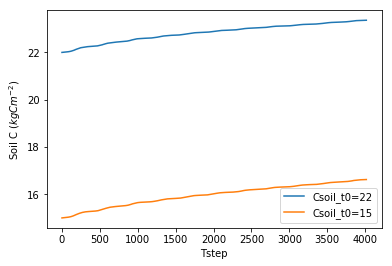

In [11]:
# - write your code here
plt.plot(cpools[:,1], label="Csoil_t0=22")
plt.plot(cpools_dec_soilC[:,1], label="Csoil_t0=15")
plt.xlabel("Tstep")
plt.ylabel("Soil C ($kgCm^{-2}$)")
plt.legend()
plt.show()

You should have a plot with two curves that start around 22 and 15 kgCm$^{-2}$, respectively and increase over time. 

The two curves look like they have a similar trend over time (i.e. that the change in soil carbon over time is increasing by the same amount for both simulations), but are there subtle differences? One way we can test this is to **just** look at the *change* in soil C over time by subtracting the initial soil C value from the whole timeseries and replot both curves using the following code. Execute the code in the box below:

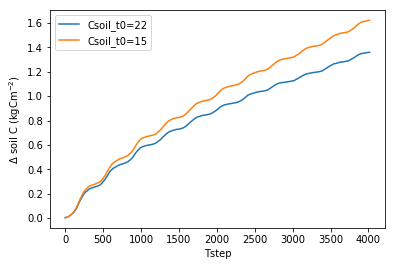

In [12]:
# - plot change in soil C pool
plt.plot(cpools[:,1] - 22, label="Csoil_t0=22")
plt.plot(cpools_dec_soilC[:,1] - 15, label="Csoil_t0=15")
plt.xlabel('Tstep')
plt.ylabel('$\Delta$ soil C (kgCm$^{-2}$)')
plt.legend()
plt.show()

Now do you notice a difference between the two simulations in terms of the evolution of the soil C pools over time?

**Question: Which simulation (with which initial soil C stock) is increasing more over time? Why do you think this might be?** [Hint: it may help you to do the next exercise - plot the other variables - before you answer the second part of this question]

ANSWER: Starting at C soil = 15 has a faster increase in soil carbon than Csoil=22. 

If we look at the model equations for soil carbon, we see that their derivative in respect to soil carbon is a fixed value for respiration and carbon transfer from soil to litter, given that the other parameters are held the same. This means that as soil carbon levels are increased, the amount of respiration and amount of carbon transfer to the litter will increase. However, the derivative in respect to soil carbon for carbon transfer from litter to soil is zero, this means that as soil carbon increases, the flux in will remain the same. This means that as we appraoch the equillbrium point, we will have a decrease in the change of soil carbon (normally) as the difference between flux in and flux out approach 0.   

**Exercise: Now plot the other variables (litter soil C and Rh for both litter and soil pools) in the code box below.**

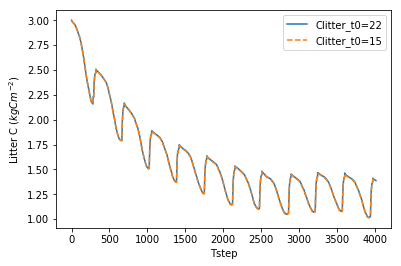

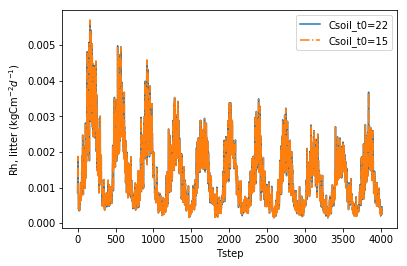

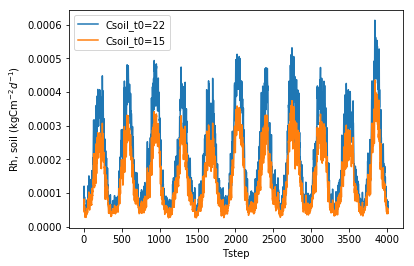

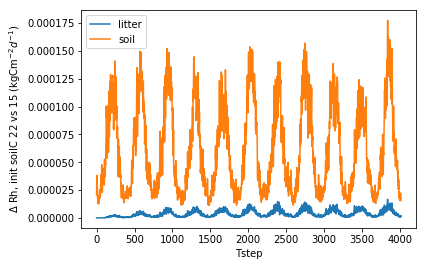

In [13]:
# - write code here
plt.plot(cpools[:,0], label="Clitter_t0=22")
plt.plot(cpools_dec_soilC[:,0],'--', label="Clitter_t0=15",)
plt.xlabel("Tstep")
plt.ylabel("Litter C ($kgCm^{-2}$)")
plt.legend()
plt.show()
# - plot change in soil C pool
plt.plot(rh[:,0], label="Csoil_t0=22")
plt.plot(rh_dec_soilC[:,0],'-.', label="Csoil_t0=15")
plt.xlabel('Tstep')
plt.ylabel('Rh, litter (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()

# - plot change in soil C pool
plt.plot(rh[:,1], label="Csoil_t0=22")
plt.plot(rh_dec_soilC[:,1], label="Csoil_t0=15")
plt.xlabel('Tstep')
plt.ylabel('Rh, soil (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()
# - plot delta in Rh between models for litter respiration
plt.plot((rh[:,0]-rh_dec_soilC[:,0]), label ="litter")
plt.plot(rh[:,1]-rh_dec_soilC[:,1], label ="soil")
plt.xlabel('Tstep')
plt.ylabel('$\Delta$ Rh, init soilC 22 vs 15 (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()

**Question: Which of the variables have changed (and which have not) between the two simulations? Using your knowledge of the model equations, explain why there is a difference between the two C pools.**

ANSWER: We see that both of the litter plots are basically the same. This is because the impact of the soil carbon on the litter is minimal (the derivative with respect to soil carbon of the change in litter pool is close to zero; the soil turnover frequency is high and the microbial efficiency is low, so the amount transfered from soil to litter is low). 

The difference between the soil Rh is greater because we now are taking $1-M_{e,soil}$, which means that the soil respiration is about a magnatude greater than the transfer from soil to litter for carbon. 


**Exercise: Now repeat the above exercise but instead make the initial soil C value *higher* than the original simulation. Set the C_soil_t0 to 100 and re-run the model.** *REMEMBER to save the latest simulations to **new** Rh and Cpool variable names.* 

**Then plot the *change* in the soil C pool over time and compare it to the original simulation where C_soil_t0=22**.

In [14]:
# - write your code here
params["C_soil_t0"]=100
rh_soilC_100,cpools_soilC_100 = model.run(params=params, input_data=input_data)

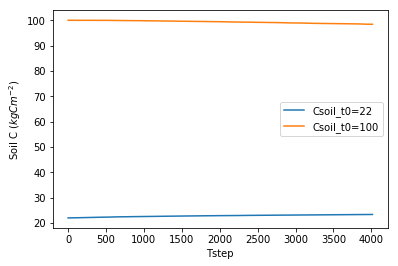

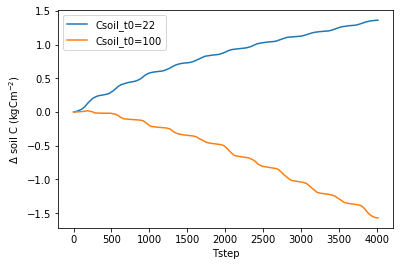

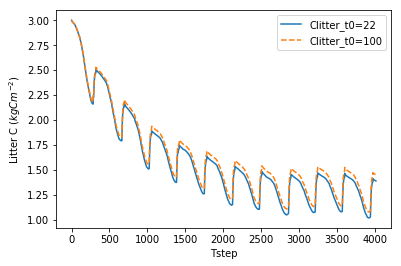

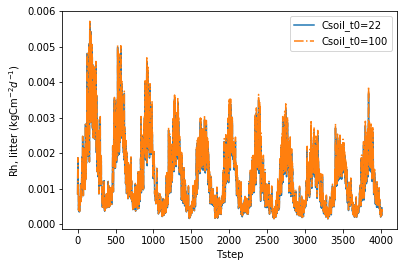

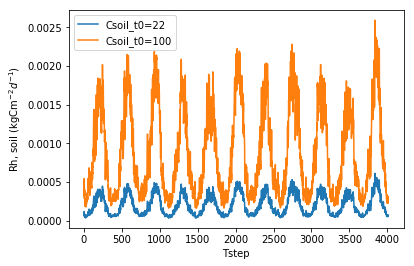

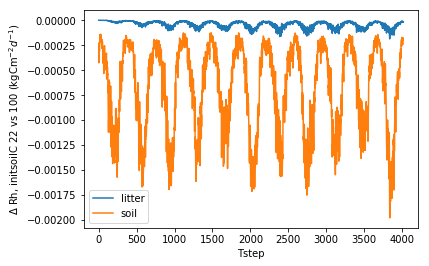

In [15]:
# - write your code here
plt.plot(cpools[:,1], label="Csoil_t0=22")
plt.plot(cpools_soilC_100[:,1], label="Csoil_t0=100")
plt.xlabel("Tstep")
plt.ylabel("Soil C ($kgCm^{-2}$)")
plt.legend()
plt.show()
# - plot change in soil C pool
plt.plot(cpools[:,1] - 22, label="Csoil_t0=22")
plt.plot(cpools_soilC_100[:,1] - 100, label="Csoil_t0=100")
plt.xlabel('Tstep')
plt.ylabel('$\Delta$ soil C (kgCm$^{-2}$)')
plt.legend()
plt.show()
# - write code here
plt.plot(cpools[:,0], label="Clitter_t0=22")
plt.plot(cpools_soilC_100[:,0],'--', label="Clitter_t0=100",)
plt.xlabel("Tstep")
plt.ylabel("Litter C ($kgCm^{-2}$)")
plt.legend()
plt.show()
# - plot change in soil C pool
plt.plot(rh[:,0], label="Csoil_t0=22")
plt.plot(rh_soilC_100[:,0],'-.', label="Csoil_t0=100")
plt.xlabel('Tstep')
plt.ylabel('Rh, litter (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()

# - plot change in soil C pool
plt.plot(rh[:,1], label="Csoil_t0=22")
plt.plot(rh_soilC_100[:,1], label="Csoil_t0=100")
plt.xlabel('Tstep')
plt.ylabel('Rh, soil (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()
# - plot delta in Rh between models for litter respiration
plt.plot((rh[:,0]-rh_soilC_100[:,0]), label ="litter")
plt.plot(rh[:,1]-rh_soilC_100[:,1], label ="soil")
plt.xlabel('Tstep')
plt.ylabel('$\Delta$ Rh, initsoilC 22 vs 100 (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()

**Question: What is the difference between the original (C_soil_t0=22) and the latest (C_soil_t0=100) soil C timeseries? Using your knowledge of the model, explain why there is such a difference.** [Hint: again, it may help you to plot all the other variables as we did above].

ANSWER: The soil carbon when C_soil_t0 =100, there is a decrease in the soil carbon because of the higher respiration rates of the soil, we also see that there is an increase in the amount of carbon flowing from the soil pool to the litter, which is promoting maintance of the carbon litter stock. This makes senese in terms of the model parameters, as C_soil is implicated in each of these properties, and indirectly in soil litter respiration. 

## Testing sensitivity of Q10

Q10 is a parameter that is usually to which model C fluxes are highly sensitive and yet most TEMs use the same value (~2.0) for all PFTs and all grid cells. This is likely a simplification (if you're interested, you can read more about this here: https://idp.nature.com/authorize/casa?redirect_uri=https://www.nature.com/articles/nclimate3421&casa_token=iKUGZu9u7i8AAAAA:sxnJrCdmPWkdQutdUdkoUBn_A1AaE9hinkxvynqPR6jFzjWmXDDysUe53gNhjKeKmGLRxorGQ5mSf1Qs

For now, we will simply re-run the model with Q10 values of 1.5 and Q10 values of 2.5. 

**Exercise: use the code you have learned above for how to change parameter values to adjust Q10 first to 1.5, and then to 2.5, and rerun the model each time - saving your Rh and Cpools outputs with different variable names each time. Plot the total C (litter + soil C pools) for *all three curves* (original Q10=2.0 plus two new simulations) on the same plot (with labels!) and then answer the question in the next box.** BUT FIRST! Set the C_soil_t0 back to 22 as in the original simulations


In [16]:
# - write your code here
params["C_soil_t0"]=22
params["Q10"]=1.5
rh_Q10_1_5,cpools_Q10_1_5 = model.run(params=params, input_data=input_data)
params["Q10"]=2.5
rh_Q10_2_5,cpools_Q10_2_5 = model.run(params=params, input_data=input_data)


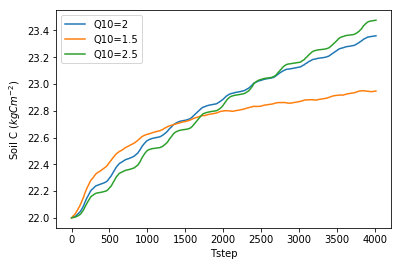

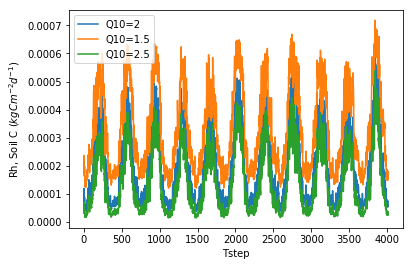

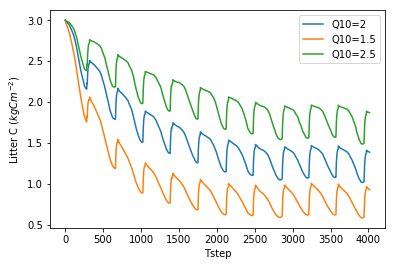

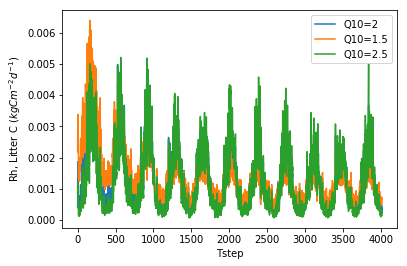

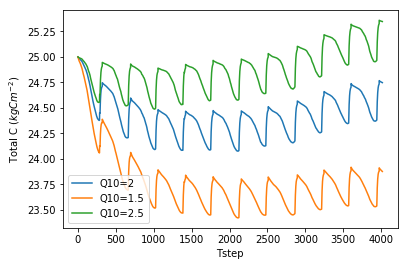

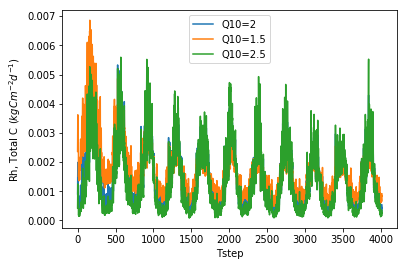

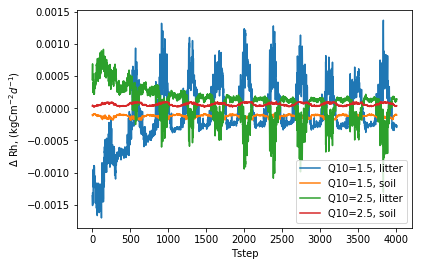

In [17]:
for rh_i,cpools_i,label_i in [(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot(cpools_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Soil C ($kgCm^{-2}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in [(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot(rh_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Rh, Soil C ($kgCm^{-2}d^{-1}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in [(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot(cpools_i[:,0], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Litter C ($kgCm^{-2}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in [(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot(rh_i[:,0], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Rh, Litter C ($kgCm^{-2}d^{-1}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in [(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot(cpools_i[:,0]+cpools_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Total C ($kgCm^{-2}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in [(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot(rh_i[:,0]+rh_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Rh, Total C ($kgCm^{-2}d^{-1}$)")
plt.legend()
plt.show()

for rh_i,cpools_i,label_i in [#(rh,cpools,"Q10=2"),
                              (rh_Q10_1_5,cpools_Q10_1_5,"Q10=1.5"),
                              (rh_Q10_2_5,cpools_Q10_2_5,"Q10=2.5")]:
    plt.plot((rh[:,0]-rh_i[:,0]), label =label_i+", litter")
    plt.plot(rh[:,1]-rh_i[:,1], label =label_i+", soil")
plt.xlabel('Tstep')
plt.ylabel('$\Delta$ Rh, (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()

Now answer the following questions:

**Question: What is the difference in the evolution of the total C pools over time between the simulations with the three different Q10 values?** 

ANSWER: We see that the total carbon is highest with Q10=2.5 and then for Q10=1.5, but with not as large of a difference. This is primarily due to the differences between soil carbon storage, while the litter carbon pool also has different equilibrium values for Q10=2.5. The shape of the curve for soil carbon is also different, where there is a higher intra year variation correlating to an increased Q10, which makes sense as Q10 is a measure of the sensitivity of reactions (in this case reallocation of carbon) to temperature. 

**Question: What do these results tell you about the importance of accurately defining Q10 in models if we are to get accurate climate change projections?** [Hint: think about the global carbon cycle and the role of terrestrial ecosystems in mitigating anthropogenic CO2 emissions]

ANSWER: If particular areas are more or less sensitive to temperature changes, we would have to redefine our Q10 parameter. If we underestimate this, we could significantly undershoot the metabolic activity of our systems (underestimating emmissions), or we could significantly overshoot the metabolic activity, which would suggest that ecosystems are less stable then they are in reality. 

Note that to fully understand the differences between the simulations with different Q10 values it would be good to re-plot the scatter plots between the temperature functions and the input temperature for both the litter and soil C pools as we did in Exercise 1. Given the Q10 temperature function is non-linear, we need to see how the temperature function responds to changes in temperature in order to see how it might affect the overall C decomposition. However, we will not do that in this class.

## Testing hypotheses of how carbon cycling will change in response to changing climate and rising CO2.

In addition to testing model behavior (and uncertainty), model sensitivity analyses can also be useful for testing hypotheses of how ecosystem function will change in responses to climate and rising CO2. We can use our hypotheses to change relevant parameters of the model as well as the climate inputs (temperature and moisture) (and in the case of this model - litter inputs).

In the example below, we test the hypothesis that litter inputs to the model will increase in the future in response to rising CO2. To do so, we artificially increase the litter inputs by fifty percent and see what the impact is on the model. 

First, we re-set all the model parameters. Execute the code box below:

In [18]:
# - re-set model parameters to original run
params['C_soil_t0'] = 22
params['Q10'] = 2.0

Next, we artificially increase the litter inputs by fifty percent. Execute the code box below:

In [19]:
# - artificially increase litter inputs by 50%
input_data.LITTER_INPUT *= 1.5

**Exercise: Now re-run the model below with the modified litter inputs and save the resultant Rh fluxes and Cpools to new variable names "rh_inc_litter" and "cpools_inc_litter". Then plot the total Rh and total C for both curves (original model vs simulation with increased litter) in the same plot (give both curves labels) and then answer the questions below.**

In [20]:
# - write your code here

rh_Litterx1_5,cpools_Litterx1_5 = model.run(params=params, input_data=input_data)


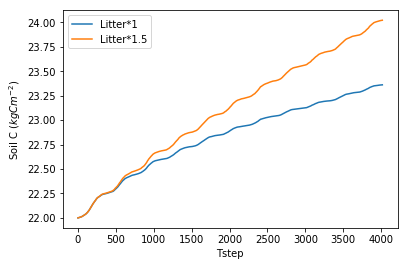

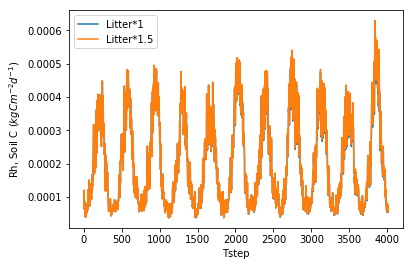

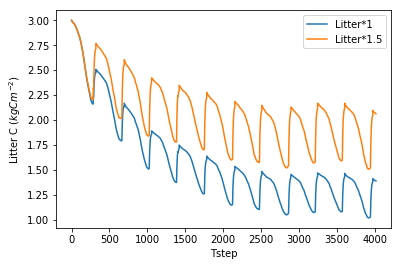

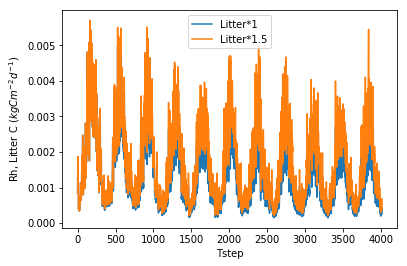

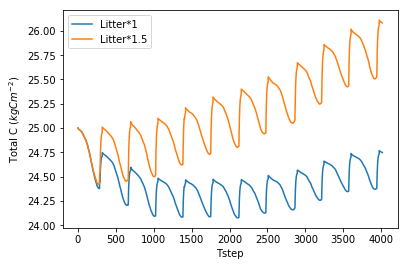

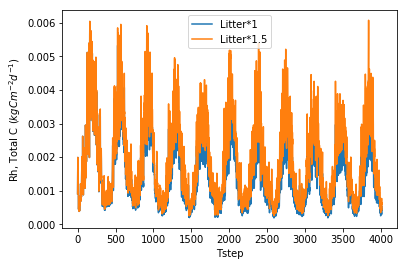

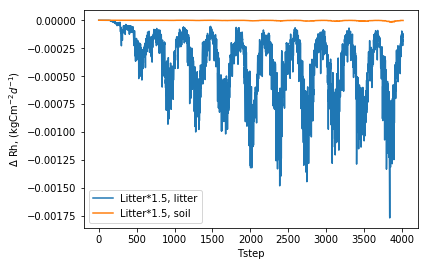

In [22]:
results_list = [(rh,cpools,"Litter*1"),(rh_Litterx1_5,cpools_Litterx1_5,"Litter*1.5")]
for rh_i,cpools_i,label_i in results_list:
    plt.plot(cpools_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Soil C ($kgCm^{-2}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in results_list:
    plt.plot(rh_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Rh, Soil C ($kgCm^{-2}d^{-1}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in results_list:
    plt.plot(cpools_i[:,0], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Litter C ($kgCm^{-2}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in results_list:
    plt.plot(rh_i[:,0], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Rh, Litter C ($kgCm^{-2}d^{-1}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in results_list:
    plt.plot(cpools_i[:,0]+cpools_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Total C ($kgCm^{-2}$)")
plt.legend()
plt.show()
for rh_i,cpools_i,label_i in results_list:
    plt.plot(rh_i[:,0]+rh_i[:,1], label=label_i)
plt.xlabel("Tstep")
plt.ylabel("Rh, Total C ($kgCm^{-2}d^{-1}$)")
plt.legend()
plt.show()

for rh_i,cpools_i,label_i in [results_list[1]]:
    plt.plot((rh[:,0]-rh_i[:,0]), label =label_i+", litter")
    plt.plot(rh[:,1]-rh_i[:,1], label =label_i+", soil")
plt.xlabel('Tstep')
plt.ylabel('$\Delta$ Rh, (kgCm$^{-2}d^{-1}$)')
plt.legend()
plt.show()

**Question: what is the difference in total Rh and total soil C between the two simulations (original litter input versus increased litter)? Using your knowlege of the model equations, explain why that is.** [You may also plot the individual pool Rh and C if you would like]

ANSWER: We see that the total Rh is higher, mainly from increased litter Rh. Soil Rh starts to increase towards the end of the simulation as there is an increase in the soil carbon stock. This makes sense as Rh is dependent on the amount of carbon in the litter and soil. The total soil c is increasing across time as the litter carbon is greater, leading to a larger transfer of carbon from the litter to the soil (there wasn't a corresponding increase in soil carbon, when we made the change, meaning that we're moving away from the equilibrium value). 

### Final thoughts/questions on model sensitivity

This last exercise shows how useful it can be to modularize TEMs - i.e. to separate out parts of the model you're interested in - so that you can have more control over the inputs and parameters of that part of the model. In this case, we have essentially separated out the litter and soil C part of much larger TEMs and as a result we could easily modify the litter inputs without having to change all the rest of the modules that would normally be involved in calculating litter inputs. Such a "simple model" exercise is extremely useful for understanding big models that have many, many interacting processes and components.

Using what you have learned this exercise, answer the following questions (note you do not have to do any further model runs - these questions are designed to test your understanding of how to set-up sensitivity experiments):

**Question: Some global change experiments suggest that C pool turnover rates might increase in future in reponse to increased litter inputs with rising atmospheric CO2.**

**How would you design a model sensitivity experiment using this model to test the impact of increasing *litter C pool* turnover rates with rising CO2? What would you expect the impact to be on total soil C?**

ANSWER: We could change tau_litter to be smaller (smaller values indicate that the half life of litter carbon is shorter). I would expect that this would reduce the amount of carbon allocated to the soil carbon pool, decreasing the equilibrium value for soil carbon. More of the litter carbon would be respirated and released into the atmosphere.

**Question: Many studies have shown that droughts have significant impacts on C cycling.** 

**How would you design a model sensitivity experiment to test the impact of increased drought events on C cycling using this model? What would you expect the impact to me on heterotrophic respiration (Rh) fluxes?**

ANSWER: It depends on what type of drought events we wanted to model. We could do a fixed decrease in the amonut of soil/litter moisture, but this would probably not be a good representation of the hydrology, as if we decrease the total amount of percipitation, that will probably have a different effect on soil moisture in comparison to litter moisture. I would suggest taking a hydrology model of soil and running it based on different percipitation trends and feed corresponding values of litter moisture and soil moisture into this model. In this manner we could more accurately state what type of drought events we are modeling (longer time between rains, but same amount of total percipitation, or lower amonuts of percipitation).

I would expect that as we have increasing periods of low moisture content (or total saturation of soil/litter), we would see decreasing respiration rates. Depending on the patterning of the drought, we could see an increase in respiration, especially if we see more time spent in the optimium soil moistures for Rh.

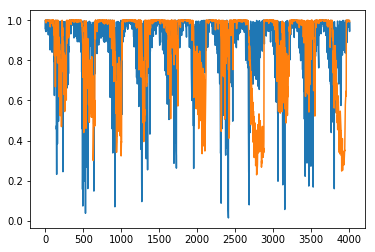

In [23]:
plt.plot(input_data['LITTER_MOIST'])
plt.plot(input_data['SOIL_MOIST'])
plt.show()

**That's it for this exericse on Model Sensitivity. Complete all the exercises and questions and upload your jupyter notebook to Canvas.**